In [2]:
!pip install scikit-learn
!pip install seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt



In [13]:
# Load the datasets
train_data = pd.read_csv("C:/Users/vinod/Downloads/train.csv.csv")
test_data = pd.read_csv("C:/Users/vinod/Downloads/test.csv.csv")

# Concatenate train and test data
full_data = pd.concat([train_data, test_data], ignore_index=True)

# Shuffle the data
shuffled_data = full_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [14]:
print(shuffled_data.head())

      id                                              title           author  \
0   4148  У генпрокурора Украины нашли дорогую квартиру ...              NaN   
1   7841  EXCLUSIVE: Inside Venezuela: Starved Families ...          Ben Kew   
2  18898     Watch: Pro-Turkey Protesters Riot in Rotterdam  Jack Montgomery   
3   4194  Dispatches from Wolf Country — Kale and Seal L...     Mike Farrell   
4   8409  Texas County Enacts "Emergency Paper Ballots" ...              NaN   

                                                text  label  
0  0 комментариев 32 поделились \n"Скандал разгор...    1.0  
1  CARACAS, Venezuela  —   Driving through the st...    0.0  
2  Hundreds of Turkish migrants and dual national...    0.0  
3    Without intention, Mike kind fulfills the pr...    1.0  
4  Texas County Enacts "Emergency Paper Ballots" ...    1.0  


In [15]:
# Check for missing values
print(shuffled_data.isnull().sum())

# Remove rows with missing values
shuffled_data = shuffled_data.dropna().reset_index(drop=True)

# Replace NaN values in the 'text' column with an empty string
shuffled_data['text'].fillna('', inplace=True)


id           0
title      680
author    2460
text        46
label     5200
dtype: int64


In [16]:
# Assuming 'text' is the column containing the text data
X = shuffled_data['text']
y = shuffled_data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# SVM

In [17]:
# Create and train an SVM classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [29]:

# Make predictions on the training set
y_train_pred = svm_model.predict(X_train_tfidf)

# Evaluate the model on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision (Test Set): {precision:.2f}")
print(f"Recall (Test Set): {recall:.2f}")
print(f"F1 Score (Test Set): {f1:.2f}")

Training Accuracy: 0.98
Test Accuracy: 0.94
Precision (Test Set): 0.94
Recall (Test Set): 0.94
F1 Score (Test Set): 0.94


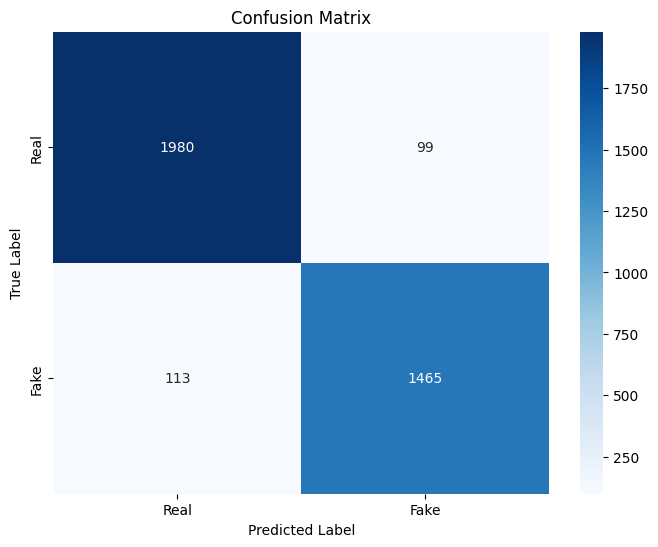

In [34]:

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# NAIVE BAYES


In [21]:
# Create and train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)


MultinomialNB()

In [30]:

# Make predictions on the training set
y_train_pred_nb = nb.predict(X_train_tfidf)

# Evaluate the model on the training set
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
print(f"Training Accuracy (Naive Bayes): {train_accuracy_nb:.2f}")

# Make predictions on the test set
y_pred_nb = nb.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Test Accuracy (Naive Bayes): {test_accuracy_nb:.2f}")

# Calculate precision, recall, and F1 score for the test set
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"Precision (Test): {precision_nb:.2f}")
print(f"Recall (Test): {recall_nb:.2f}")
print(f"F1 Score (Test): {f1_nb:.2f}")

Training Accuracy (Naive Bayes): 0.91
Test Accuracy (Naive Bayes): 0.89
Precision (Test): 0.89
Recall (Test): 0.89
F1 Score (Test): 0.89


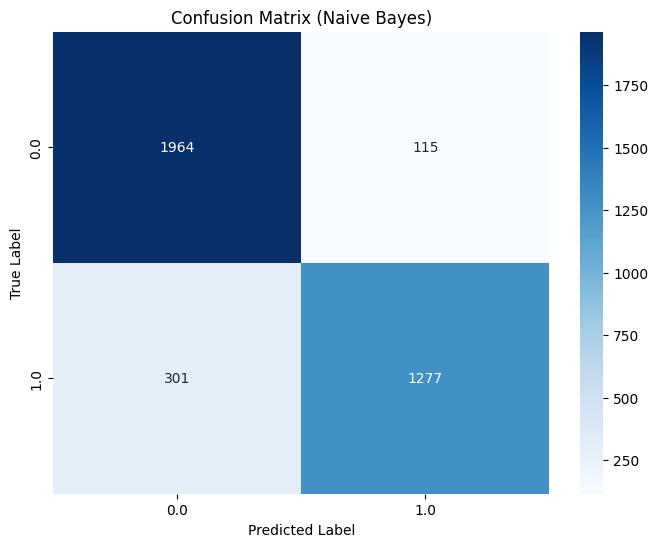

In [33]:

# Display confusion matrix
matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_nb, annot=True, fmt="d", cmap="Blues", xticklabels=nb.classes_, yticklabels=nb.classes_)
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# RANDOM FOREST

In [24]:
# Create and train the RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=0)

In [31]:

# Make predictions on the training set
y_train_pred_rfc = RFC.predict(X_train_tfidf)

# Evaluate the model on the training set
train_accuracy_rfc = accuracy_score(y_train, y_train_pred_rfc)
print(f"Training Accuracy (Random Forest): {train_accuracy_rfc:.2f}")

# Make predictions on the test set
y_pred_rfc = RFC.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f"Test Accuracy (Random Forest): {test_accuracy_rfc:.2f}")

# Calculate precision, recall, and F1-score for the test set
precision_rfc = precision_score(y_test, y_pred_rfc, average='weighted')
recall_rfc = recall_score(y_test, y_pred_rfc, average='weighted')
f1_rfc = f1_score(y_test, y_pred_rfc, average='weighted')

print(f"Precision (Test): {precision_rfc:.2f}")
print(f"Recall (Test): {recall_rfc:.2f}")
print(f"F1 Score (Test): {f1_rfc:.2f}")

Training Accuracy (Random Forest): 1.00
Test Accuracy (Random Forest): 0.94
Precision (Test): 0.94
Recall (Test): 0.94
F1 Score (Test): 0.94


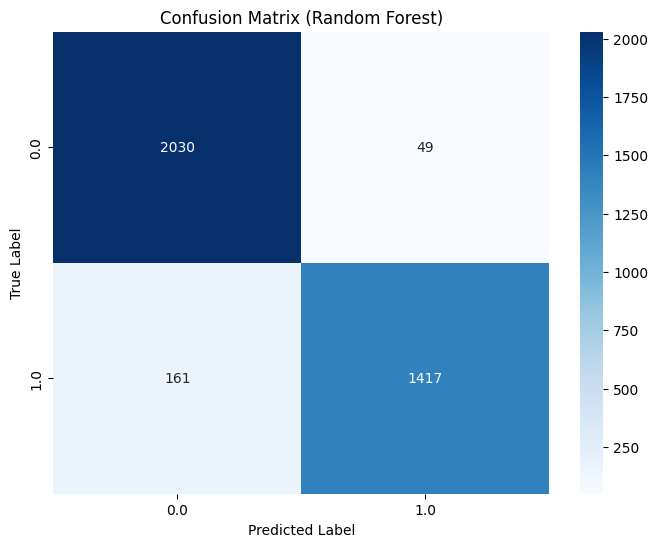

In [32]:

# Display confusion matrix
matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_rfc, annot=True, fmt="d", cmap="Blues", xticklabels=RFC.classes_, yticklabels=RFC.classes_)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# GRADIENT BOOSTER

In [36]:
# Create and train the GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=0)

In [38]:

# Make predictions on the training set
y_train_pred_gbc = GBC.predict(X_train_tfidf)

# Evaluate the model on the training set
train_accuracy_gbc = accuracy_score(y_train, y_train_pred_gbc)
print(f"Training Accuracy (Gradient Boosting): {train_accuracy_gbc:.2f}")

# Make predictions on the test set
y_pred_gbc = GBC.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f"Test Accuracy (Gradient Boosting): {test_accuracy_gbc:.2f}")

# Calculate precision, recall, and F1-score for the test set
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')

print(f"Precision (Test): {precision_gbc:.2f}")
print(f"Recall (Test): {recall_gbc:.2f}")
print(f"F1 Score (Test): {f1_gbc:.2f}")

Training Accuracy (Gradient Boosting): 0.94
Test Accuracy (Gradient Boosting): 0.92
Precision (Test): 0.92
Recall (Test): 0.92
F1 Score (Test): 0.92


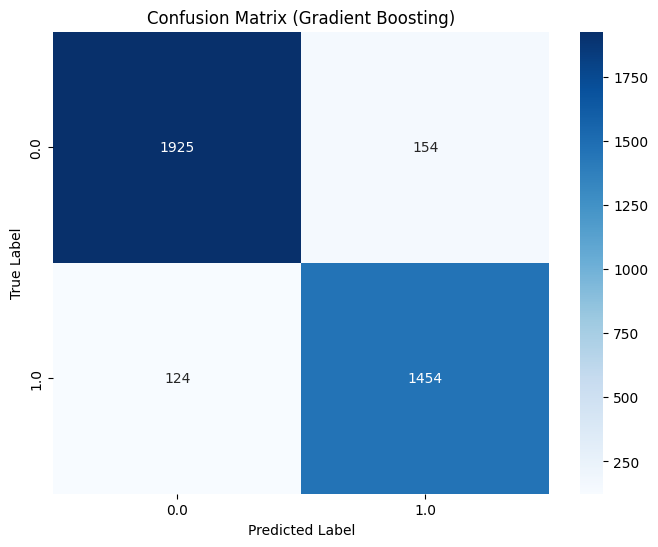

In [39]:

# Display confusion matrix
matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_gbc, annot=True, fmt="d", cmap="Blues", xticklabels=GBC.classes_, yticklabels=GBC.classes_)
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC CURVE

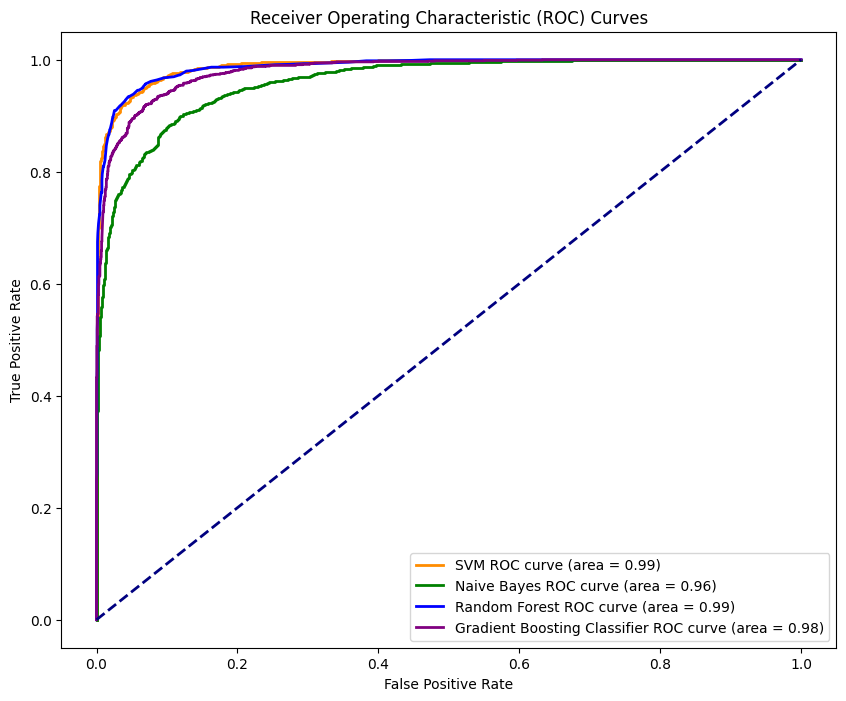

In [40]:


# Get predicted probabilities for the positive class
y_pred_prob_svm = svm_model.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Get predicted probabilities for the positive class
y_pred_prob_nb = nb.predict_proba(X_test_tfidf)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Get predicted probabilities for the positive class
y_pred_prob_rfc = RFC.predict_proba(X_test_tfidf)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

# Get predicted probabilities for the positive class
y_pred_prob_gbc = GBC.predict_proba(X_test_tfidf)[:, 1]
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_pred_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

# Plot ROC curves in a single graph
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label=f'Naive Bayes ROC curve (area = {roc_auc_nb:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='purple', lw=2, label=f'Gradient Boosting Classifier ROC curve (area = {roc_auc_gbc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
